Load in data and reshape to n_train x x_dim x y_dim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical

# import dataset into pandas
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

# get pixels and labels separately
train_pixels = train_df.drop('label', axis=1).values
train_labels = train_df['label'].values

# reshape pixels into images (width x height x 1)
num_train = train_pixels.shape[0]
img_width = int(np.sqrt(train_pixels.shape[1]))
img_height = int(np.sqrt(train_pixels.shape[1]))
train_pixels = train_pixels.reshape(num_train, img_width, img_height, 1)

# turn labels into categorical vectors
train_labels = to_categorical(train_labels)

ImportError: No module named keras.models

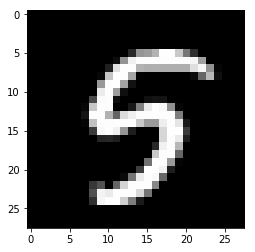

In [3]:
%matplotlib inline
imgplot = plt.imshow(train_pixels[8,:,:,0], cmap='gray')

In [4]:
# create model
model = Sequential()
model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/Ricky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Ricky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  """


In [ ]:
# train model
model.fit(train_pixels, train_labels,
          nb_epoch=10,
          batch_size=200,
          validation_split=0.1,
          verbose=True)

/Users/Ricky/anaconda/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
18600/37800 [=============>................] - ETA: 20s - loss: 5.6395 - acc: 0.4959

In [50]:
# predict on test set and write submission file
test_pixels = test_df.values

# reshape pixels into images (width x height x 1)
num_test = test_pixels.shape[0]
test_pixels = test_pixels.reshape(num_test, img_width, img_height, 1)

submission = pd.Series(index=range(1, len(test_df) + 1),
                       data=model.predict_classes(test_pixels))

# write predictions to .csv file for submission
submission.name = 'Label'
submission.to_csv('../dataset/submission.csv',
                  index_label='ImageId',
                  header=True)

27680/28000 [============================>.] - ETA: 0s